In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

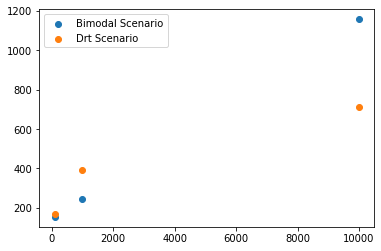

In [2]:
reqs = np.array([100, 1000, 10000])
waiting_times_bimod = np.array([15432, 246822, 11568406])
waiting_times_drt = np.array([16902, 394001, 7112125])

waiting_times_bimod_av = waiting_times_bimod/reqs
waiting_times_drt_av = waiting_times_drt/reqs

fig, ax = plt.subplots()

ax.scatter(reqs, waiting_times_bimod_av, label='Bimodal Scenario')
ax.scatter(reqs, waiting_times_drt_av, label='Drt Scenario')
plt.legend()

plt.show()

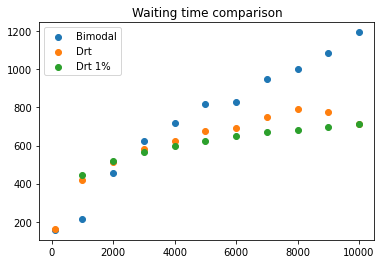

In [7]:
directory_bim = "/home/helge/Programs/matsim/matsim_results/10h_bimodal_100drts_17102020/"
directory_drt = "/home/helge/Programs/matsim/matsim_results/10h_drt_100drts_17102020/"
directory_drt_1perc = "/home/helge/Programs/matsim/matsim_results/10h_drt_1percent-drts_17102020/"

def get_times(directory):
    reqs = []
    total_times = []
    
    for root, subdirs, files in os.walk(directory):
        for file in files:
            if file == '0.waitStats_drt.csv':
                requests = re.match(".*/(\d*)reqs/.*", root)
                file = open(os.path.join(root,file))
                for x in file:
                    total_time = re.match("Total waiting time;(\d*\.*\d*E?\d*)", x)
                    if total_time:
                        reqs.append(requests.group(1))
                        total_times.append(total_time.group(1))
                file.close()
    
    total_times = np.array([float(time) for time in total_times])
    reqs = np.array([float(request) for request in reqs])
    return reqs, total_times


requests_bim, times_bim = get_times(directory_bim)
requests_drt, times_drt = get_times(directory_drt)
requests_drt_1perc, times_drt_1perc = get_times(directory_drt_1perc)

plt.scatter(requests_bim, times_bim/requests_bim, label="Bimodal")
plt.scatter(requests_drt, times_drt/requests_drt, label="Drt")
plt.scatter(requests_drt_1perc, times_drt_1perc/requests_drt_1perc, label="Drt 1%")
plt.title('Waiting time comparison')
plt.legend()
plt.show()